# Data Gathering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import requests
from PIL import Image
from io import BytesIO
import os
import glob


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 1. The WeRateDogs Twitter archive
Download this file manually, then upload it to the Jupyter workspace.

In [2]:
df_1=pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 2. Download Tweet image predictions

In [3]:
# To download 'image_predictions.tsv' programmatically.
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
content=response.content
tsv_file=open('image_predictions.tsv', 'wb')
tsv_file.write(content)
tsv_file.close()

In [4]:
df_2=pd.read_csv('image_predictions.tsv', sep='\t')
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 3. Scraping data using Tweepy

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [6]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'


In [7]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

In [9]:
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [10]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

In [11]:
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [12]:
# Create an empty list to append information
tweet_list=[]
# Extract information from each JSON node with in the .txt file
with open('tweet-json.txt') as json_file:
    for json_rec in json_file:
        tweet_imp=json.loads(json_rec)
        tweet_list.append({'tweet_id': tweet_imp['id'],
                           'favorite_count': tweet_imp['favorite_count'],
                           'retweet_count' : tweet_imp['retweet_count']})

In [13]:
df_3=pd.DataFrame(tweet_list, columns=['tweet_id','favorite_count','retweet_count'])
df_3.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [14]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
df_1.set_index('tweet_id');
df_2.set_index('tweet_id');
df_3.set_index('tweet_id');

In [17]:
df_4=df_1.merge(df_3, how='outer', left_index=True, right_index=True)

In [18]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id_x                    2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
tweet_id_y                    23

In [19]:
df_4.head()

,tweet_id_x,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_id_y,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8.924206e+17,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,8.921774e+17,33819.0,6514.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,8.918152e+17,25461.0,4328.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8.916896e+17,42908.0,8964.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,8.913276e+17,41048.0,9774.0


In [20]:
df_5=df_4.merge(df_2, how='outer', left_index=True, right_index=True)

In [21]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id_x                    2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
tweet_id_y                    23

In [22]:
df_5.head()

,tweet_id_x,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### I have combined all the columns into one dataframe. Next, I'll start data cleaning.

Identify Issues:
<br> Data Quality:
<br> 1. Two rows (2344 and 2355) have missing values in `favorite_count` and `retweet_count`.
<br> 2. Incorrect datatype: `favorite_count` and `retweet_count` should be integers.
<br> 3. Incorrect datatype: `timestamp` should be datatime.
<br> 4. Incorrect datatype: `img_num` should be integer.
<br> 5.`rating_denominator` should all be 10.
<br> 6. Incorrect values in the `rating_numerator` column.
<br> 7. Except for 394 tweets, the others' `dog stages` are not identified.
<br> 8. Incorrect names.
<br> Data Tidiness:
<br> 1. `doggo`,`floofer`,`pupper`,and `puppo` should combined into one column `stages`.
<br> 2. Redundant information:
<br>--`in_reply_to_status_id`and `in_reply_to_user_id` both indicate whether the tweet has replies
<br>--`retweeted_status_id` and `retweeted_status_user_id` both indicate whether it was retweeted
<br> 3. Duplicate columns: `tweet_id`.
<br> 4. Breed information should be in one column.

In [23]:
# Access the rating denominators
df_5.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [24]:
df_5.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
df_5.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [26]:
df_reply_status=df_5[df_5.in_reply_to_status_id.notnull()]

In [27]:
df_reply_user=df_5[df_5.in_reply_to_user_id.notnull()]

In [28]:
np.array_equal(df_reply_status.tweet_id_x, df_reply_user.tweet_id_x)

True

In [29]:
df_retweet=df_5[df_5.retweeted_status_id.notnull()]

In [30]:
df_retweet_user=df_5[df_5.retweeted_status_user_id.notnull()]

In [31]:
np.array_equal(df_retweet.tweet_id_x, df_retweet_user.tweet_id_x)

True

In [32]:
df_5.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [33]:
df_5.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [34]:
df_5.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [35]:
df_5.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [36]:
print (97+10+257+30)

394


In [37]:
df_5.name.nunique()

957

In [38]:
df_5.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Buddy          7
Bailey         7
Daisy          7
an             7
Toby           7
Oscar          6
Scout          6
Leo            6
Rusty          6
Koda           6
Jack           6
Milo           6
Stanley        6
Bella          6
Jax            6
Dave           6
Bentley        5
            ... 
Sage           1
Karll          1
Fido           1
Stefan         1
Aja            1
Simba          1
Pherb          1
Wishes         1
Zara           1
Stephanus      1
Carll          1
Henry          1
Tito           1
Bones          1
Edmund         1
Lenox          1
Kenzie         1
Remus          1
Mutt           1
Jordy          1
Ester          1
Pete           1
Jennifur       1
Maya           1
Alf            1
Ivar           1
Herb           1
Gustaf        

In [39]:
df_5[df_5.duplicated()]

,tweet_id_x,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [40]:
df_5[df_5.favorite_count.isnull()]

,tweet_id_x,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_5[df_5.retweet_count.isnull()]

,tweet_id_x,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Define Issues:
Data Quality:
1. Delete rows with missing `favorite_count` and `retweet_count` information.
2. Convert `favorite_count` and `retweet_count` from floats into integers.
3. Convert `timestamp` into datetime. 
4. Convert `img_num` into integers.
5. Set the values in the `rating_denominator` column all as 10.
6. Re-write the `rating_numerator` column by extracting the ratings from text. 
7. Re-write the `dog stages` column by extracting from the text.
8. Re-write the `name` column.
<br> Data Integrity:
1. Combine all the dummy columns assocaited with dog stages into one.
2. Create two dummy columns to indicate whether the tweets have replies or retweets.
3. Delete the last 2 `tweet_id` columns.
4. Consolidate the dog breed info into one column: select the correct image recognition by `query` function, and then delete other columns.

1. Delete rows with missing `favorite_count` and `retweet_count` information.

In [42]:
# Find the rows where retweet_count and favorite_count are missing.
df_5[df_5.retweet_count.isnull()]

,tweet_id_x,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_5[df_5.favorite_count.isnull()]

,tweet_id_x,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Drop these two rows.
df_5.drop([2354,2355], inplace=True)

2. Convert `favorite_count` and `retweet_count` from floats into integers.

In [45]:
# Convert retweet_count and favorite_count into integers.
df_5.retweet_count=df_5.retweet_count.astype('int64')
df_5.favorite_count=df_5.favorite_count.astype('int64')

In [46]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 32 columns):
tweet_id_x                    2354 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2354 non-null object
source                        2354 non-null object
text                          2354 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2295 non-null object
rating_numerator              2354 non-null int64
rating_denominator            2354 non-null int64
name                          2354 non-null object
doggo                         2354 non-null object
floofer                       2354 non-null object
pupper                        2354 non-null object
puppo                         2354 non-null object
tweet_id_y                    23

3. Convert `timestamp` into datetime. 

In [47]:
# Convert timestamp into datetime.
df_5.timestamp=pd.to_datetime(df_5.timestamp)

4. Convert `img_num` into integers.

In [48]:
# To convert img_num into integers, I will first need to fill 
# the missing values in this column.

In [49]:
df_5.img_num=df_5.img_num.fillna(0)

In [50]:
df_5.img_num=df_5.img_num.astype('int64')

5. Set the values in the `rating_denominator` column all as 10.

In [51]:
# To correct the rating_denominator column, fill the entire
# column with 10.
df_5.rating_denominator=df_5.rating_denominator.replace(df_5.rating_denominator, 10)

In [52]:
df_5.rating_denominator=df_5.rating_denominator.astype('int64')

6. Re-write the `rating_numerator` column by extracting the ratings from text. 

In [53]:
# Correct the rating_numerator column by extracting numbers from the text
df_5.rating_numerator=df_5.text.str.extract('([0-9]+/+10)', expand=True)

In [54]:
df_5.rating_numerator=df_5.rating_numerator.str[:-3]


In [55]:
df_5.rating_numerator=df_5.rating_numerator.fillna(0)

In [56]:

df_5.rating_numerator=df_5.rating_numerator.astype('int64')

In [57]:
df_5.rating_numerator.value_counts()

12      558
11      464
10      462
13      353
9       157
8       101
14       56
7        53
5        37
6        32
3        19
0        18
4        15
2         9
1         8
75        2
420       2
15        2
26        1
182       1
27        1
1776      1
17        1
666       1
Name: rating_numerator, dtype: int64

In [58]:
# Delete the rows with incorrect ratings
df_filtered=df_5.query('10<= rating_numerator <20')

In [59]:
df_filtered.rating_numerator.describe()

count    1896.000000
mean       11.518987
std         1.147055
min        10.000000
25%        11.000000
50%        12.000000
75%        12.000000
max        17.000000
Name: rating_numerator, dtype: float64

7. Re-write the `dog stages` column by extracting from the text.

In [60]:
df_filtered.doggo.value_counts()

None     1804
doggo      92
Name: doggo, dtype: int64

In [61]:
doggo = df_filtered.text.str.extract('(doggo)')
doggo.describe()
# From the result we can see, there are even fewer doggo identified than 
# original data, so the doggo column won't be replaced. Need to replace 
# "None".

,0
count,90
unique,1
top,doggo
freq,90


In [62]:
df_filtered.doggo.replace('None', '', inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [63]:
df_filtered.floofer.value_counts()

None       1886
floofer      10
Name: floofer, dtype: int64

In [64]:
floofer=df_filtered.text.str.extract('(floofer)')
floofer.describe()
# Not going to replace the floofer column either. 

,0
count,4
unique,1
top,floofer
freq,4


In [65]:
df_filtered.floofer.replace('None', '', inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [66]:
df_filtered.pupper.value_counts()

None      1683
pupper     213
Name: pupper, dtype: int64

In [67]:
pupper = df_filtered.text.str.extract('(pupper)')
pupper.describe()
# Since there are more puppers than the original dataframe has identified,
# will replace the pupper column.

,0
count,217
unique,1
top,pupper
freq,217


In [68]:
df_filtered.pupper=pupper
df_filtered.pupper.value_counts()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


pupper    217
Name: pupper, dtype: int64

In [69]:
df_filtered.puppo.value_counts()

None     1867
puppo      29
Name: puppo, dtype: int64

In [70]:
puppo=df_filtered.text.str.extract('(puppo)')
puppo.describe()
# Will replace the puppo column.

,0
count,36
unique,1
top,puppo
freq,36


In [71]:
df_filtered.puppo=puppo
df_filtered.puppo.value_counts()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


puppo    36
Name: puppo, dtype: int64

8. Re-write the `name` column.

In [72]:
# For dog names, replace "None", "a", and "the" with empty value.
df_filtered.name.replace('None', '', inplace=True)
df_filtered.name.replace('a', '', inplace=True)
df_filtered.name.replace('the', '', inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


1. Combine all the dummy columns assocaited with dog stages into one.

In [73]:
df_filtered.puppo=df_filtered.puppo.fillna('')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [74]:
df_filtered.pupper=df_filtered.pupper.fillna('')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [75]:
stage=df_filtered.doggo + df_filtered.floofer + df_filtered.pupper + df_filtered.puppo

In [76]:
df_filtered.insert(5, "stage", stage, True)

In [77]:
df_filtered.stage.value_counts()

                1553
pupper           208
doggo             80
puppo             34
doggopupper        9
floofer            9
doggopuppo         2
doggofloofer       1
Name: stage, dtype: int64

In [78]:
df_filtered.loc[df_filtered.stage == 'doggopupper', 'stage'] = 'doggo,pupper'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [79]:
df_filtered.loc[df_filtered.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [80]:
df_filtered.loc[df_filtered.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [81]:
df_filtered.stage.value_counts()

                 1553
pupper            208
doggo              80
puppo              34
doggo,pupper        9
floofer             9
doggo,puppo         2
doggo,floofer       1
Name: stage, dtype: int64

In [82]:
df_filtered.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


2. Create two dummy columns to indicate whether the tweets have replies or retweets.

In [83]:
reply=df_filtered.in_reply_to_status_id.notnull()

In [84]:
df_filtered.insert(5, "reply", reply, True)

In [85]:
df_filtered.reply.describe()

count      1896
unique        2
top       False
freq       1836
Name: reply, dtype: object

In [86]:
retweeted=df_filtered.retweeted_status_id.notnull()

In [87]:
df_filtered.insert(5, "retweeted", retweeted, True)

In [88]:
df_filtered.retweeted.describe()

count      1896
unique        2
top       False
freq       1724
Name: retweeted, dtype: object

In [89]:
df_filtered.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_id'], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


3. Delete the last 2 `tweet_id` columns.

In [90]:
df_filtered.drop(columns=['tweet_id_y','tweet_id'], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [91]:
df_filtered.rename(columns={'tweet_id_x':'tweet_id'}, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


4. Consolidate breed information.
<br> To find the breed of each dog, I select the correct image predictions (from the first, second, and third attempts), and then append them together. 

In [92]:
df_breed1 = df_filtered.query('p1_dog==True')

In [93]:
df_breed1.drop(['p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [94]:
df_breed1.rename(columns={"p1":"breed"}, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [95]:
df_breed1

,tweet_id,timestamp,source,retweeted,reply,stage,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467,8853,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908,8964,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,Here we have a majestic great white breaching ...,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,,20562,3261,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,When you watch your owner call another dog a g...,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,,56848,16716,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",False,False,doggo,This is Cassie. She is a college pup. Studying...,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,32467,7711,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle
10,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Koda. He is a South Australian decksha...,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,31166,7624,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever
11,889880896479866881,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Bruno. He is a service shark. Only get...,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,28268,5156,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter


In [96]:
df_breed2 = df_filtered.query('p1_dog==False & p2_dog==True')
df_breed2.drop(['p1_conf','p1_dog','p1','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [97]:
df_breed2.rename(columns={"p2":"breed"}, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [98]:
df_breed3 = df_filtered.query('p1_dog==False & p2_dog==False & p3_dog==True')
df_breed3.drop(['p1_conf','p1_dog','p2','p2_conf','p2_dog','p1','p3_conf','p3_dog'], axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [99]:
df_breed3.rename(columns={"p3":"breed"}, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [100]:
df_breed4 = df_filtered.query('p1_dog==False & p2_dog==False & p3_dog==False')
df_breed4

,tweet_id,timestamp,source,retweeted,reply,stage,text,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,Meet Jax. He enjoys ice cream so much he gets ...,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,...,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,888804989199671297,2017-07-22 16:56:37,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Zeke. He has a new stick. Very proud o...,NaN,https://twitter.com/dog_rates/status/888804989...,13,...,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,888554962724278272,2017-07-22 00:23:06,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Ralphus. He's powering up. Attempting ...,NaN,https://twitter.com/dog_rates/status/888554962...,13,...,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,887705289381826560,2017-07-19 16:06:48,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Jeffrey. He has a monopoly on the pool...,NaN,https://twitter.com/dog_rates/status/887705289...,13,...,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,887101392804085760,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This... is a Jubilant Antarctic House Bear. We...,NaN,https://twitter.com/dog_rates/status/887101392...,12,...,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,886366144734445568,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" r...",False,False,pupper,This is Roscoe. Another pupper fallen victim t...,NaN,https://twitter.com/dog_rates/status/886366144...,12,...,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
50,882627270321602560,2017-07-05 15:48:34,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Stanley. He has his first swim lesson ...,NaN,https://twitter.com/dog_rates/status/882627270...,13,...,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,882268110199369728,2017-07-04 16:01:23,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Alfy. You're witnessing his first wate...,NaN,https://twitter.com/dog_rates/status/882268110...,13,...,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,881906580714921986,2017-07-03 16:04:48,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Rey. He's a Benebop Cumberfloof. 12/10...,NaN,https://twitter.com/dog_rates/status/881906580...,12,...,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False
56,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",False,False,pupper,Here is a pupper approaching maximum borkdrive...,NaN,https://twitter.com/dog_rates/status/881536004...,14,...,1,jigsaw_puzzle,0.560001,False,doormat,1.032590e-01,False,space_heater,4.256800e-02,False


In [101]:
df_breed4.drop(['p1_conf','p1_dog','p2','p2_conf','p2_dog','p1','p3_conf','p3_dog', 'p3'], axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [102]:
df_breed4.insert(16, "breed", "Unknown")

In [103]:
df_breed4

,tweet_id,timestamp,source,retweeted,reply,stage,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,breed
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,Meet Jax. He enjoys ice cream so much he gets ...,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,12041,2158,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Unknown
17,888804989199671297,2017-07-22 16:56:37,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Zeke. He has a new stick. Very proud o...,NaN,https://twitter.com/dog_rates/status/888804989...,13,10,Zeke,26080,4559,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,Unknown
18,888554962724278272,2017-07-22 00:23:06,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Ralphus. He's powering up. Attempting ...,NaN,https://twitter.com/dog_rates/status/888554962...,13,10,Ralphus,20290,3732,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,Unknown
21,887705289381826560,2017-07-19 16:06:48,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Jeffrey. He has a monopoly on the pool...,NaN,https://twitter.com/dog_rates/status/887705289...,13,10,Jeffrey,46959,12082,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,Unknown
25,887101392804085760,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This... is a Jubilant Antarctic House Bear. We...,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,,35859,8084,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,Unknown
29,886366144734445568,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" r...",False,False,pupper,This is Roscoe. Another pupper fallen victim t...,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,117,4,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,Unknown
50,882627270321602560,2017-07-05 15:48:34,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Stanley. He has his first swim lesson ...,NaN,https://twitter.com/dog_rates/status/882627270...,13,10,Stanley,45880,12118,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,Unknown
51,882268110199369728,2017-07-04 16:01:23,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Alfy. You're witnessing his first wate...,NaN,https://twitter.com/dog_rates/status/882268110...,13,10,Alfy,29900,5203,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,Unknown
53,881906580714921986,2017-07-03 16:04:48,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Rey. He's a Benebop Cumberfloof. 12/10...,NaN,https://twitter.com/dog_rates/status/881906580...,12,10,Rey,51522,11099,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,Unknown
56,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",False,False,pupper,Here is a pupper approaching maximum borkdrive...,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,,23501,5358,https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg,1,Unknown


In [104]:
df_nobreed = df_filtered[df_filtered['p1'].isnull()]
df_nobreed.drop(['p1_conf','p1_dog','p1','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [105]:
df_nobreed.rename(columns={"p2":"breed"}, inplace=True)
df_nobreed.breed.fillna("Unknown", inplace=True)
df_nobreed

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,tweet_id,timestamp,source,retweeted,reply,stage,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,breed
2075,670840546554966016,2015-11-29 05:43:44,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,Meet Colby. He's that one cool friend that get...,NaN,https://twitter.com/dog_rates/status/670840546...,10,10,Colby,474,135,NaN,0,Unknown
2078,670832455012716544,2015-11-29 05:11:35,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Amy. She is Queen Starburst. 10/10 une...,NaN,https://twitter.com/dog_rates/status/670832455...,10,10,Amy,824,205,NaN,0,Unknown
2080,670823764196741120,2015-11-29 04:37:03,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Remington. He's a man dime. 12/10 http...,NaN,https://twitter.com/dog_rates/status/670823764...,12,10,Remington,3410,1708,NaN,0,Unknown
2081,670822709593571328,2015-11-29 04:32:51,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,Can't do better than this lol. 10/10 for the o...,NaN,https://twitter.com/dog_rates/status/670822709...,10,10,,1202,295,NaN,0,Unknown
2082,670815497391357952,2015-11-29 04:04:12,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Sage. He likes to burn shit. 10/10 htt...,NaN,https://twitter.com/dog_rates/status/670815497...,10,10,Sage,1234,546,NaN,0,Unknown
2083,670811965569282048,2015-11-29 03:50:10,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,Meet Maggie. She enjoys her stick in the yard....,NaN,https://twitter.com/dog_rates/status/670811965...,10,10,Maggie,2098,1035,NaN,0,Unknown
2084,670807719151067136,2015-11-29 03:33:17,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,"Say hello to Andy. He can balance on one foot,...",NaN,https://twitter.com/dog_rates/status/670807719...,11,10,Andy,362,95,NaN,0,Unknown
2085,670804601705242624,2015-11-29 03:20:54,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,Meet Mason. He's a total frat boy. Pretends to...,NaN,https://twitter.com/dog_rates/status/670804601...,10,10,Mason,780,262,NaN,0,Unknown
2086,670803562457407488,2015-11-29 03:16:46,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,I would do radical things in the name of Dog G...,NaN,https://twitter.com/dog_rates/status/670803562...,10,10,,889,298,NaN,0,Unknown
2087,670797304698376195,2015-11-29 02:51:54,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Trigger. He was minding his own busine...,NaN,https://twitter.com/dog_rates/status/670797304...,11,10,Trigger,700,255,NaN,0,Unknown


In [106]:
df_master=df_breed1.append(df_breed2.append(df_breed3.append(df_nobreed.append(df_breed4))))
df_master

,tweet_id,timestamp,source,retweeted,reply,stage,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467,8853,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908,8964,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,Here we have a majestic great white breaching ...,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,,20562,3261,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,When you watch your owner call another dog a g...,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,,56848,16716,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",False,False,doggo,This is Cassie. She is a college pup. Studying...,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,32467,7711,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle
10,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Koda. He is a South Australian decksha...,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,31166,7624,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever
11,889880896479866881,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",False,False,,This is Bruno. He is a service shark. Only get...,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,28268,5156,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter


In [107]:
df_master.to_csv('twitter_archive_master.csv', index=False)

## Analyze Data

1. Compare the ratings of different dog stages. Are their differences statistically significant?

In [108]:
rating=df_master.groupby('stage')['rating_numerator'].mean()
rating

stage
                 11.493239
doggo            12.075000
doggo,floofer    11.000000
doggo,pupper     11.666667
doggo,puppo      13.000000
floofer          11.888889
pupper           11.360577
puppo            12.147059
Name: rating_numerator, dtype: float64

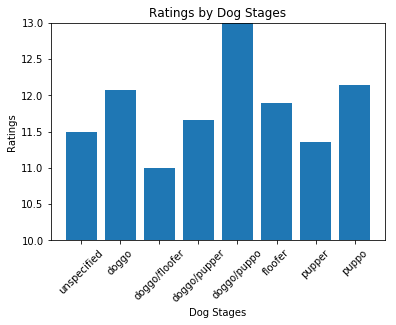

In [109]:
plt.bar([1,2,3,4,5,6,7,8], rating,tick_label=['unspecified','doggo','doggo/floofer','doggo/pupper','doggo/puppo','floofer','pupper','puppo'])
plt.title('Ratings by Dog Stages')
plt.ylim(10, 13)
plt.xlabel('Dog Stages')
plt.xticks(rotation=45)
plt.ylabel('Ratings');

In [110]:
df_puppo = df_master.query('stage=="puppo" & rating_numerator > 0')
puppo_rating=df_puppo['rating_numerator'].values
puppo_rating

array([13, 13, 13, 12, 12, 11, 10, 12, 12, 13, 13, 12, 12, 12, 12, 12, 12,
       13, 12, 10, 10, 10, 13, 12, 11, 11, 14, 13, 13, 13, 13, 13, 13, 13])

In [111]:
df_doggo = df_master.query('stage=="doggo" & rating_numerator > 0')
doggo_rating=df_doggo['rating_numerator'].values

In [112]:
df_floofer = df_master.query('stage=="floofer" & rating_numerator > 0')
floofer_rating=df_floofer['rating_numerator'].values

In [113]:
df_pupper = df_master.query('stage=="pupper" & rating_numerator > 0')
pupper_rating=df_pupper['rating_numerator'].values

In [114]:
df_unspecified=df_master.query('stage=="" & rating_numerator >0')
unspecified_rating=df_unspecified['rating_numerator'].values

In [115]:
df_specified=df_master.query('stage!="" & rating_numerator >0')
specified_rating=df_specified['rating_numerator'].values

In [116]:
import scipy.stats as stats

In [117]:
stats.ttest_ind(a=puppo_rating, b=pupper_rating, equal_var=False)

Ttest_indResult(statistic=4.0229503872605958, pvalue=0.00021257266244522249)

In [118]:
stats.ttest_ind(a=doggo_rating, b=puppo_rating, equal_var=False)

Ttest_indResult(statistic=-0.3203256278144635, pvalue=0.74965764732212026)

In [119]:
stats.ttest_ind(a=floofer_rating, b=puppo_rating, equal_var=False)

Ttest_indResult(statistic=-0.65411215550592061, pvalue=0.52486465699628493)

In [120]:
stats.ttest_ind(a=puppo_rating, b=unspecified_rating, equal_var=False)

Ttest_indResult(statistic=3.5903960428493757, pvalue=0.0010090073545960705)

Among all the dog stages, "doggo, floofer" has the highest average rating. However, there are only two such cases, and their ratings are both 13, so it's not really suitable for statistical analysis. 
<br> <br> Therefore, I choose the second highest stage--puppo. By comparing it with different stages, the conclusion can be drawn that puppo has higher ratings than pupper and unspecified dogs. It is not significantly higher than the ratings of doggo and floofer. 

In [121]:
specified_rating.mean(), unspecified_rating.mean()

(11.635568513119534, 11.493238892466195)

In [122]:
stats.ttest_ind(a=specified_rating, b=unspecified_rating, equal_var=False)

Ttest_indResult(statistic=2.056373390666534, pvalue=0.040267164962716852)

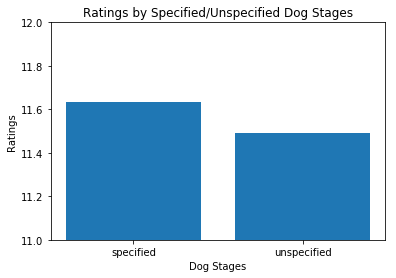

In [123]:
plt.bar([1,2],[specified_rating.mean(), unspecified_rating.mean()], tick_label=['specified','unspecified'])
plt.title('Ratings by Specified/Unspecified Dog Stages')
plt.ylim(11, 12)
plt.xlabel('Dog Stages')
plt.ylabel('Ratings');

From the analysis above we can see that, the specified group has a higher average rating than the unspecified group.

2. Compare the number of favorites and retweets of different breeds. 

In [124]:
df_master.breed.value_counts()

Unknown                       449
golden_retriever              136
Labrador_retriever             95
Chihuahua                      81
Pembroke                       75
pug                            55
toy_poodle                     45
chow                           42
Samoyed                        40
Pomeranian                     39
malamute                       29
Chesapeake_Bay_retriever       27
French_bulldog                 23
cocker_spaniel                 23
miniature_pinscher             19
Maltese_dog                    19
Staffordshire_bullterrier      19
Shih-Tzu                       19
Cardigan                       18
Eskimo_dog                     18
beagle                         18
kuvasz                         17
Siberian_husky                 17
Italian_greyhound              17
Shetland_sheepdog              16
Rottweiler                     16
German_shepherd                16
Lakeland_terrier               16
basset                         14
schipperke    

In [125]:
unknown=df_master.query('breed=="Unknown"').favorite_count.mean()
golden_retriever=df_master.query('breed=="golden_retriever"').favorite_count.mean()
Labrador_retriever=df_master.query('breed=="Labrador_retriever"').favorite_count.mean()
Chihuahua=df_master.query('breed=="Chihuahua"').favorite_count.mean()
Pembroke=df_master.query('breed=="Pembroke"').favorite_count.mean()
pug=df_master.query('breed=="pug"').favorite_count.mean()
toy_poodle=df_master.query('breed=="toy_poodle"').favorite_count.mean()
chow=df_master.query('breed=="chow"').favorite_count.mean()
Samoyed=df_master.query('breed=="Samoyed"').favorite_count.mean()
Pomeranian=df_master.query('breed=="Pomeranian"').favorite_count.mean()

In [126]:
favorites=[unknown, golden_retriever, Labrador_retriever, Chihuahua, Pembroke, pug, toy_poodle, chow, Samoyed, Pomeranian]
label=['unknown', 'golden_retriever', 'Labrador_retriever', 'Chihuahua', 'Pembroke', 'pug', 'toy_poodle', 'chow', 'Samoyed', 'Pomeranian']

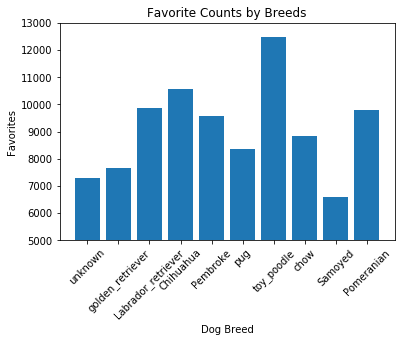

In [127]:
plt.bar([1,2,3,4,5,6,7,8,9,10], favorites, tick_label=label)
plt.title('Favorite Counts by Breeds')
plt.ylim(5000, 13000)
plt.xlabel('Dog Breed')
plt.xticks(rotation=45)
plt.ylabel('Favorites');

In [128]:
unknown=df_master.query('breed=="Unknown"').retweet_count.mean()
golden_retriever=df_master.query('breed=="golden_retriever"').retweet_count.mean()
Labrador_retriever=df_master.query('breed=="Labrador_retriever"').retweet_count.mean()
Chihuahua=df_master.query('breed=="Chihuahua"').retweet_count.mean()
Pembroke=df_master.query('breed=="Pembroke"').retweet_count.mean()
pug=df_master.query('breed=="pug"').retweet_count.mean()
toy_poodle=df_master.query('breed=="toy_poodle"').retweet_count.mean()
chow=df_master.query('breed=="chow"').retweet_count.mean()
Samoyed=df_master.query('breed=="Samoyed"').retweet_count.mean()
Pomeranian=df_master.query('breed=="Pomeranian"').retweet_count.mean()

In [129]:
retweets=[unknown, golden_retriever, Labrador_retriever, Chihuahua, Pembroke, pug, toy_poodle, chow, Samoyed, Pomeranian]

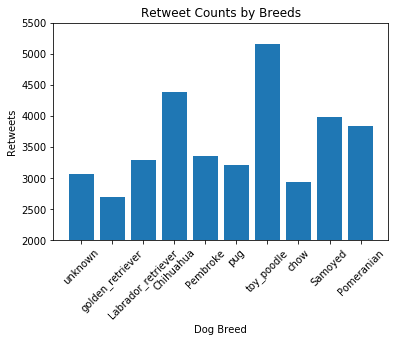

In [130]:
plt.bar([1,2,3,4,5,6,7,8,9,10], retweets, tick_label=label)
plt.title('Retweet Counts by Breeds')
plt.ylim(2000, 5500)
plt.xlabel('Dog Breed')
plt.xticks(rotation=45)
plt.ylabel('Retweets');

From the above two graphs we can see that, toy poodle is the most popular dog, in terms of both favorites and retweets.

3. Is rating correlated with the numbers of favorites and retweets?

In [132]:
retweets=df_master.groupby(['rating_numerator']).retweet_count.mean()
values1=retweets.values
df_retweets=pd.DataFrame(columns=['rating','retweets','intercept'])

In [133]:
df_retweets.rating=[10, 11, 12, 13, 14, 15, 17]
df_retweets.retweets=values1
df_retweets.intercept=[1,1,1,1,1,1,1]
df_retweets

,rating,retweets,intercept
0,10,2216.391775,1
1,11,2771.178879,1
2,12,4039.616487,1
3,13,4695.835694,1
4,14,8723.821429,1
5,15,8112.500000,1
6,17,16570.000000,1


In [134]:
favorites=df_master.groupby(['rating_numerator']).favorite_count.mean()
values2=favorites.values
df_favorites=pd.DataFrame(columns=['rating','favorite','intercept'])

In [135]:
df_favorites.rating=[10, 11, 12, 13, 14, 15, 17]
df_favorites.favorite=values2
df_favorites.intercept=[1,1,1,1,1,1,1]
df_favorites

,rating,favorite,intercept
0,10,4962.515152,1
1,11,6440.293103,1
2,12,10572.743728,1
3,13,14337.932011,1
4,14,19174.000000,1
5,15,9591.500000,1
6,17,50199.000000,1


In [136]:
lm1=sm.OLS(df_retweets.retweets, df_retweets[['intercept','rating']])
results1=lm1.fit()
results1.summary()

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               retweets   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     40.66
Date:                Sun, 21 Mar 2021   Prob (F-statistic):            0.00140
Time:                        00:05:55   Log-Likelihood:                -61.276
No. Observations:                   7   AIC:                             126.6
Df Residuals:                       5   BIC:                             126.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.901e+04   4094.534     -4.642      0.006   -2.95e+04   -8481.131
rating      1958.4195    307.145      6.376      0.001    1168.878    2747.961
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.168
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.413
Skew:                          -0.027   Prob(JB):                        0.813
Kurtosis:                       1.811   Cond. No.                         80.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

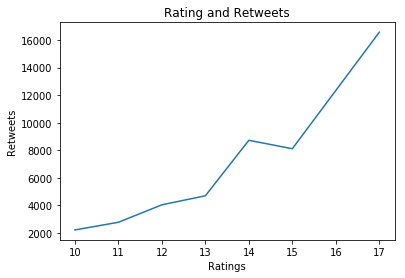

In [137]:
plt.plot(df_retweets.rating, df_retweets.retweets)
plt.title('Rating and Retweets')
plt.xlabel('Ratings')
plt.ylabel('Retweets')
plt.show()

From the above analysis, the linear regression model between rating and retweets is $$ Retweets = 1958.4195 * Ratings - 19010 $$
<br> Both the slope and the intercept are statistically significant, meaning that there exists a positive correlation between rating and retweets.

In [138]:
lm2=sm.OLS(df_favorites.favorite, df_favorites[['intercept','rating']])
results2=lm2.fit()
results2.summary()

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               favorite   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     9.954
Date:                Sun, 21 Mar 2021   Prob (F-statistic):             0.0252
Time:                        00:05:55   Log-Likelihood:                -73.154
No. Observations:                   7   AIC:                             150.3
Df Residuals:                       5   BIC:                             150.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5.304e+04   2.23e+04     -2.374      0.064    -1.1e+05    4403.175
rating      5288.5528   1676.231      3.155      0.025     979.664    9597.441
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.331
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.337
Skew:                          -0.527   Prob(JB):                        0.845
Kurtosis:                       3.212   Cond. No.                         80.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

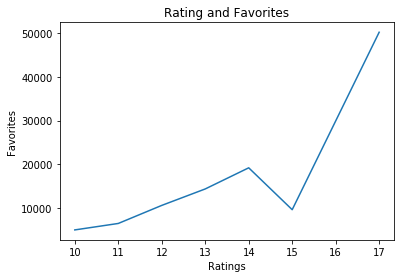

In [139]:
plt.plot(df_favorites.rating, df_favorites.favorite)
plt.title('Rating and Favorites')
plt.xlabel('Ratings')
plt.ylabel('Favorites')
plt.show()

From the above analysis, the linear regression model between rating and retweets is $$ Favorites = 5288.5528 * Ratings - 53040 $$
<br> Although the intercept is not statistically significant, the slope still is, meaning that there exists a positive correlation between rating and retweets.